In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import sys
path_parent=os.path.dirname(os.getcwd())
sys.path.insert(0,path_parent)

from src import ReadData
from src import rcwa

## 1. Optical index

make sure that eps have negative sign: eps=eps1-eps2

In [2]:
path_optical_index=path_parent+'/dataNK/'
path_Si=path_optical_index+ 'aSiH.txt'
Si_wl, Si_nk=ReadData.read_nk(path_Si)

wavelength_range=np.linspace(400.,700.,81)
e_Si=ReadData.interpolate(wavelength_range,[Si_wl, Si_nk])

#reflectance and transmission
e_ref=1.46**2; e_trn=1.; 

## 2. Input parameters

In [3]:
sim=rcwa()
sim.setup(wavelength_range=wavelength_range,
        LxLy=[400,400],              # periodic length [Lx,Ly]
        NxNy=[400,400],              # simulation domain [Nx,Ny]
        order=[5,5],                 # diffraction order [mx,my]
        angle=[0,0],                 # [AOI_d,Azimuth_d] in degree             
        e_ref=e_ref,                 # reflected medium
        e_trn=e_trn,                 # transmitted medium
        source='TM',                 # TM - x polarize, or TE- y polarized state                 
            )

## 3. Geometry: 

In [4]:
layer=sim.Geometry.layer()
mask=sim.Geometry.Circle(D=200) 
layer['medium']={'eps':1,'eps_name':'air','h':400}
layer['pattern']={'eps':e_Si, 'eps_name':'Si','mask':mask}
Structure=[layer] 

C:\Users\hpham\Desktop\RCWA_numpy\src\Geometry.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


## 4. Visualization

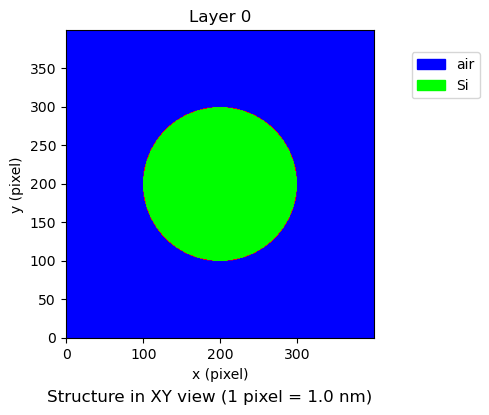

In [5]:
sim.Plot.XY(Structure,layer_position=[0])

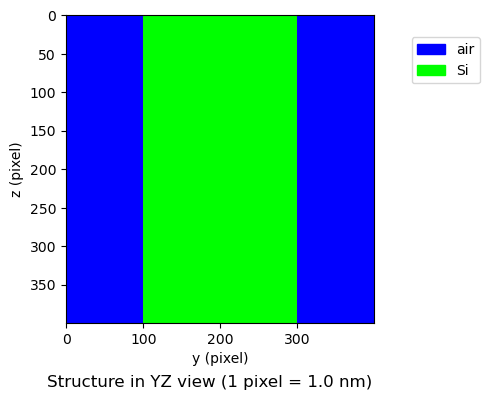

In [6]:
sim.Plot.YZ(Structure)

## 5. Simulation

In [7]:
t0=time.time()
Ref=[];  Trn=[]
for wth in range(len(wavelength_range)):         
    
    #Scattering matrix
    S_layer=sim.S_layer(Structure,idx=wth)    
    S_global=sim.S_System(S_layer,S_Ref=True,S_Trn=False)    
    
    #Coefficient 
    S_global_11=S_global[0];    S_global_21=S_global[2]; 
    rx,ry= sim.coeff(S_global_11)  
    tx,ty= sim.coeff(S_global_21)      
    
    # Ref and Trn
    R=sim.Reflectance(rx,ry)        
    Ref.append(np.sum(R))        
    
    T=sim.Transmittance(tx,ty)      
    Trn.append(np.sum(T))     

Ref=np.array(Ref)
Trn=np.array(Trn) 
print(time.time() -t0)    

28.546029567718506


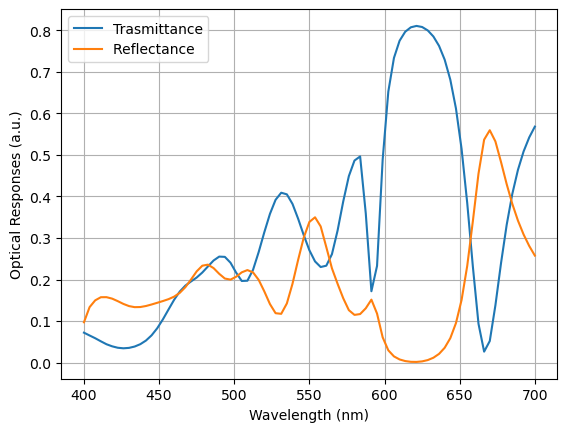

In [8]:
# View spectrum
plt.plot(wavelength_range,Trn,label='Trasmittance')
plt.plot(wavelength_range,Ref,label='Reflectance ')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Optical Responses (a.u.)')
plt.legend(loc="upper left")
plt.grid()